# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and tensorflow.

In [9]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and Preprocess the Dataset
Load the dataset, drop null rows, and convert the date column to datetime format.

In [10]:
# Load and Preprocess the Dataset
# Load the dataset
df = pd.read_csv('dataset/sales_4.csv')

# Drop null rows
df.dropna(inplace=True)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample the data to monthly frequency, summing up the product_count
monthly_data = df['product_count'].resample('M').sum()

# Display the first few rows of the preprocessed data
monthly_data.head()

date
2021-01-31    127776
2021-02-28    133930
2021-03-31    154891
2021-04-30    153073
2021-05-31    142206
Freq: M, Name: product_count, dtype: int64

# Visualize the Data
Plot the product_count over time to visualize the data.

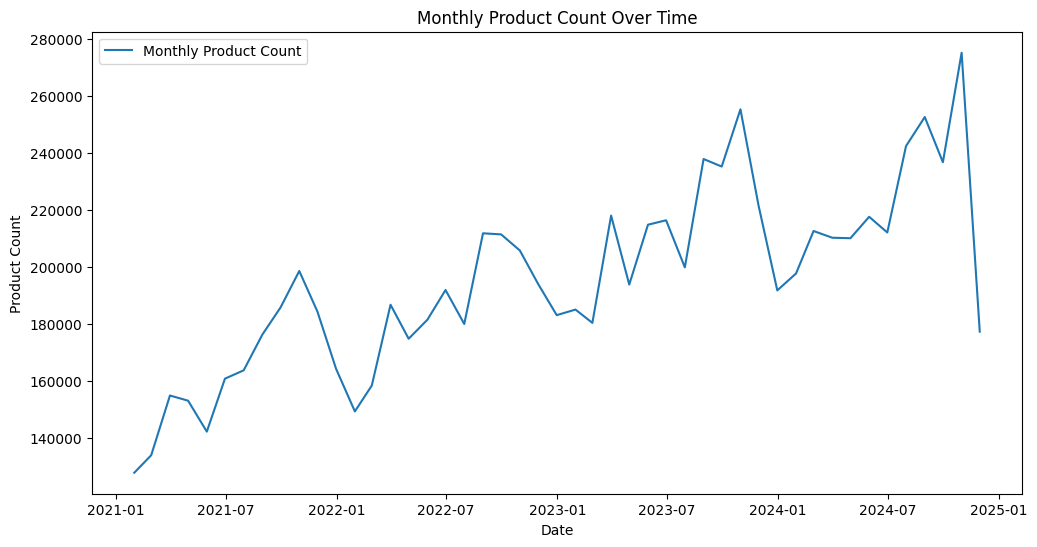

In [11]:
# Visualize the Data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Product Count')
plt.title('Monthly Product Count Over Time')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

# Prepare Data for LSTM Model
Resample the data to monthly frequency, normalize the data, and create sequences for the LSTM model.

In [12]:
# Prepare Data for LSTM Model

from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_data.values.reshape(-1, 1))

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 12  # Using 12 months to predict the next month

# Create sequences and labels
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 12, 1), (7, 12, 1), (28, 1), (7, 1))

# Build and Compile the LSTM Model
Build the LSTM model using TensorFlow/Keras and compile it with appropriate loss function and optimizer.

In [13]:
# Build and Compile the LSTM Model

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# Train the LSTM Model
Train the LSTM model using the training data.

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0074 - val_loss: 0.0262
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0065 - val_loss: 0.0262
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0081 - val_loss: 0.0272
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0096 - val_loss: 0.0321
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0083 - val_loss: 0.0278
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0109 - val_loss: 0.0260
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0056 - val_loss: 0.0275
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0105 - val_loss: 0.0268
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0088 - val_loss: 0.0286
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0076 - val_loss: 0.0255
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0078 - val_loss: 0.0279
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0

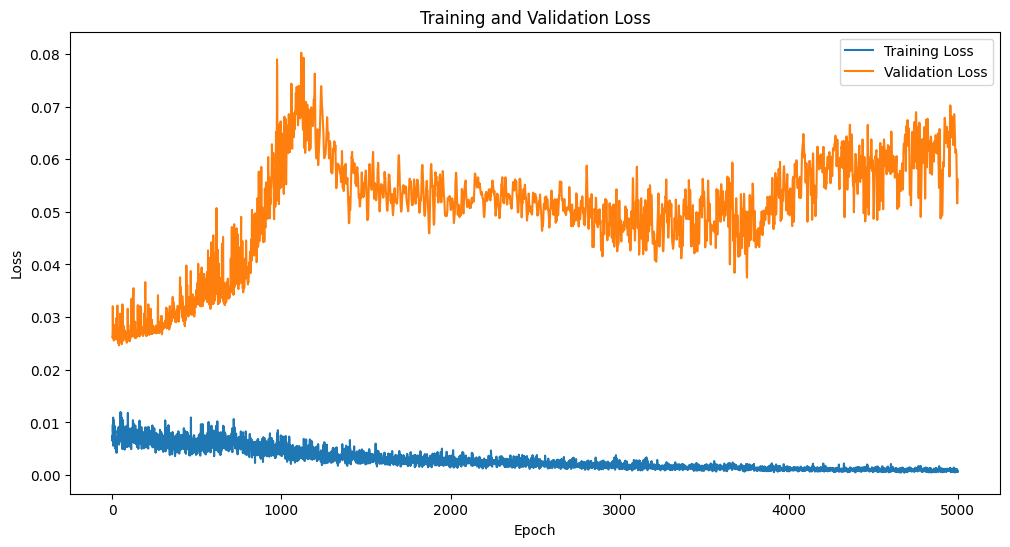

In [20]:
# Train the LSTM Model

# Train the model using the training data
history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions
Use the trained LSTM model to make predictions for the months after the dataset ends.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


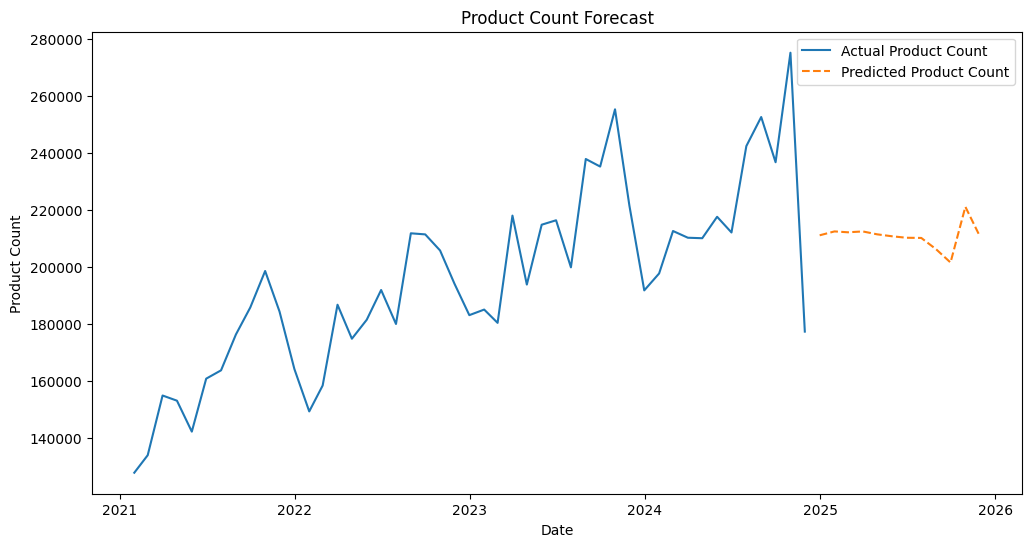

In [21]:
# Make Predictions

# Use the trained LSTM model to make predictions for the months after the dataset ends

# Predict the next 12 months
def predict_future(model, data, sequence_length, num_predictions):
    predictions = []
    current_sequence = data[-sequence_length:]
    for _ in range(num_predictions):
        prediction = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], [[prediction]], axis=0)
    return predictions

# Number of months to predict
num_predictions = 12

# Predict future values
future_predictions = predict_future(model, scaled_data, sequence_length, num_predictions)

# Inverse transform the predictions to get actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions
last_date = monthly_data.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=num_predictions, freq='M')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['product_count'])

# Plot the actual data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Product Count')
plt.plot(future_df, label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

# Visualize the Predictions
Plot the actual and predicted product_count to visualize the performance of the model.

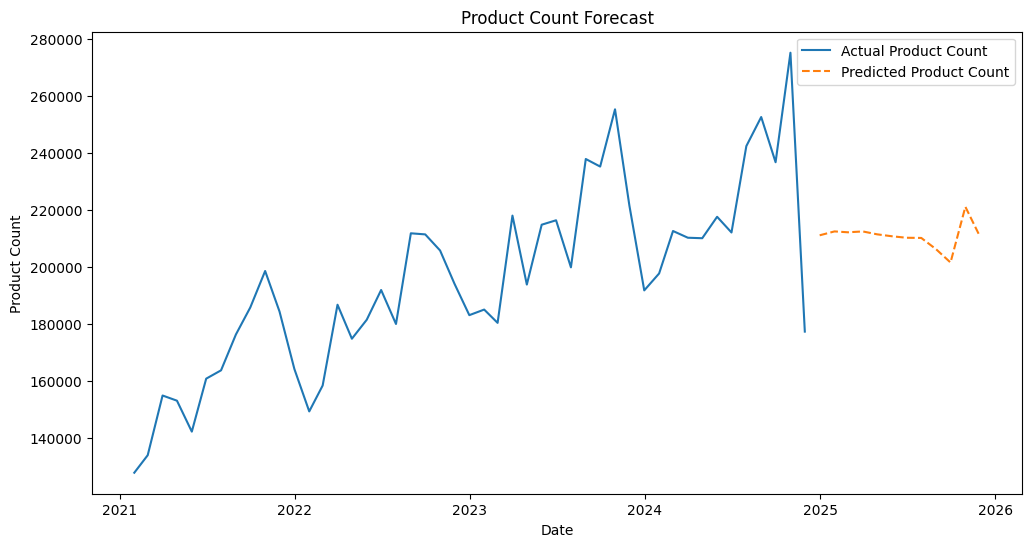

In [22]:
# Visualize the Predictions

# Plot the actual data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Product Count')
plt.plot(future_df, label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

## Using Prophet

12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing


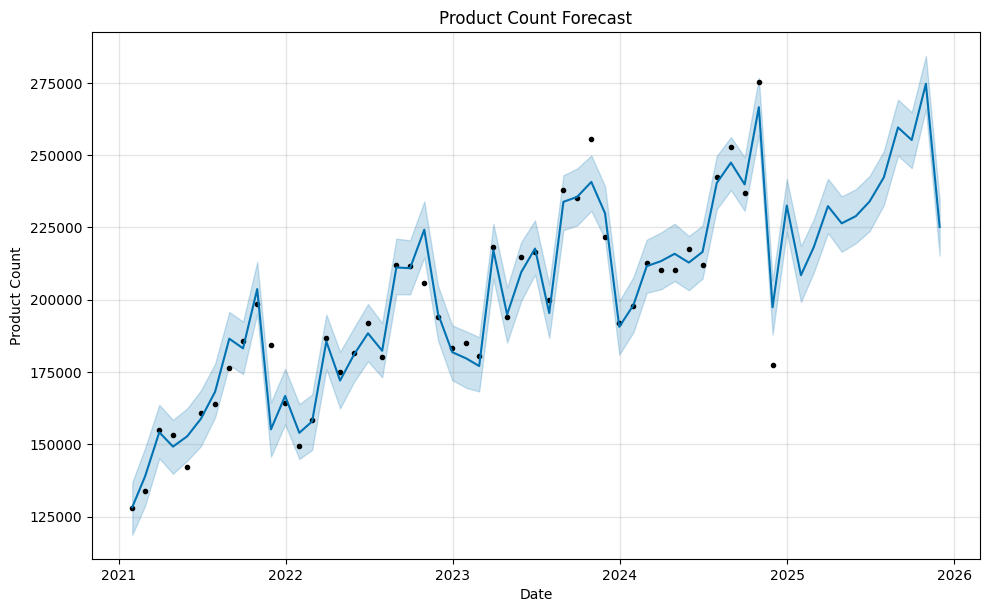

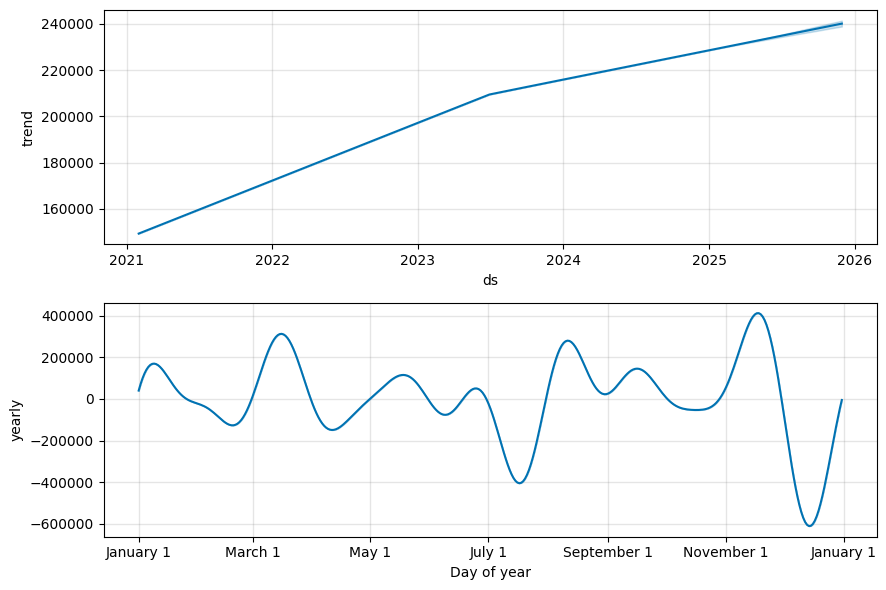

In [2]:
# Import required libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed as mentioned in the previous cells

# Convert the date column to datetime format if not already done
df['ds'] = pd.to_datetime(df['ds'])

# Aggregate the data on a monthly basis
monthly_df = df.resample('M', on='ds').sum().reset_index()

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(monthly_df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


## LSTM

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('dataset/sales_4.csv')

# Drop null rows
df.dropna(inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Aggregate product_count by month
df = df.resample('M', on='date').agg({'product_count': 'sum'}).reset_index()

# Split the data into training and testing sets based on the date
train_df = df[df['date'] < '2024-01-01']
test_df = df[df['date'] >= '2024-01-01']

# Prepare the data for LSTM model
train_data = train_df['product_count'].values.reshape(-1, 1)
test_data = test_df['product_count'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Create the dataset matrix
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define time step
time_step = 12

# Create training and testing datasets
X_train, y_train = create_dataset(scaled_train_data, time_step)

# Ensure there are enough data points for the test set
if len(scaled_test_data) > time_step:
    X_test, y_test = create_dataset(scaled_test_data, time_step)
    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
else:
    X_test, y_test = np.array([]), np.array([])

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=5000)


Epoch 1/5000


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1615
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259 
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160     
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0324     
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226 
Epoch 8/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0521
Epoch 9/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0501
Epoch 10/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169    
Epoch 11/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 
Epoch 12/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257    
Epoch 13/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0415
Epoch 14/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268    
Epoch 15/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


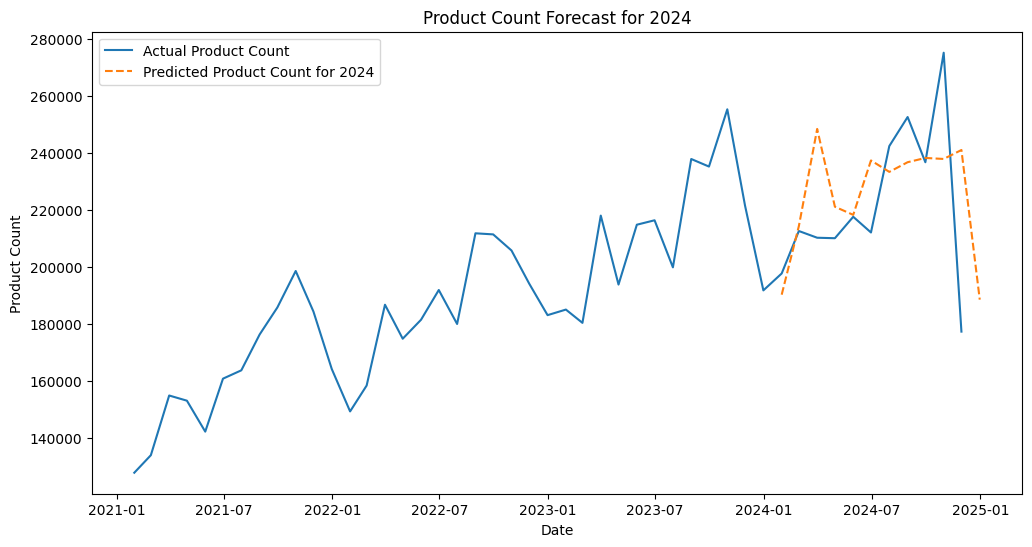

In [33]:
# Predict the product count for each month in 2024
num_predictions_2024 = 12
future_predictions_2024 = predict_future(model, scaled_data, time_step, num_predictions_2024)

# Inverse transform the predictions to get actual values
future_predictions_2024 = scaler.inverse_transform(np.array(future_predictions_2024).reshape(-1, 1))

# Create a date range for the future predictions
future_dates_2024 = pd.date_range(start='2024-01-01', periods=num_predictions_2024, freq='M')

# Create a DataFrame for the future predictions
future_df_2024 = pd.DataFrame(data=future_predictions_2024, index=future_dates_2024, columns=['product_count'])

# Plot the actual data and the future predictions for 2024
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['product_count'], label='Actual Product Count')
plt.plot(future_df_2024.index, future_df_2024['product_count'], label='Predicted Product Count for 2024', linestyle='--')
plt.title('Product Count Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


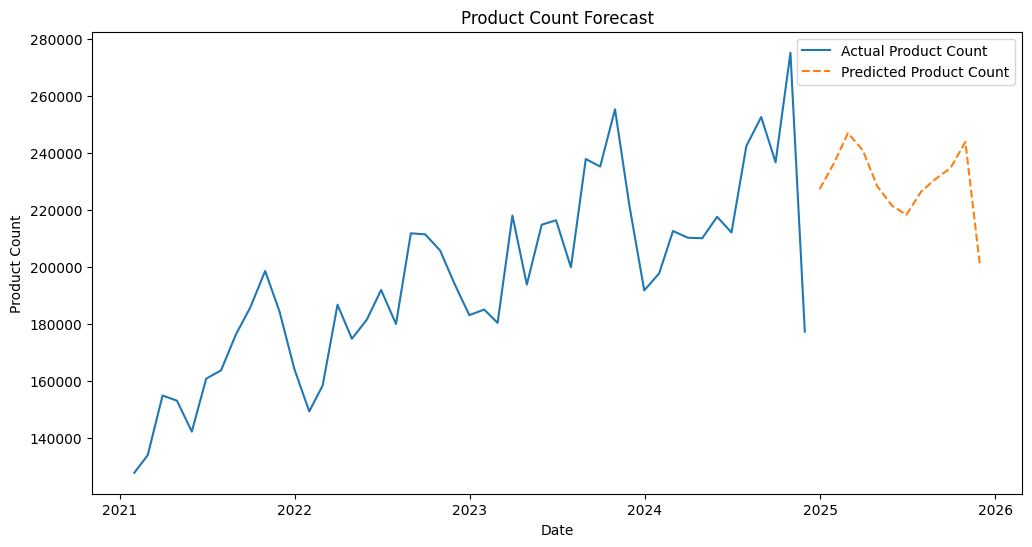

In [21]:

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
# Predict the next 12 months
def predict_future(model, data, sequence_length, num_predictions):
    predictions = []
    current_sequence = data[-sequence_length:]
    for _ in range(num_predictions):
        prediction = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], [[prediction]], axis=0)
    return predictions

# Number of months to predict
num_predictions = 12

# Predict future values
future_predictions = predict_future(model, scaled_data, train_time_step, num_predictions)

# Inverse transform the predictions to get actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions
last_date = df['date'].iloc[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=num_predictions, freq='M')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['product_count'])

# Plot the actual data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['product_count'], label='Actual Product Count')
plt.plot(future_df.index, future_df['product_count'], label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

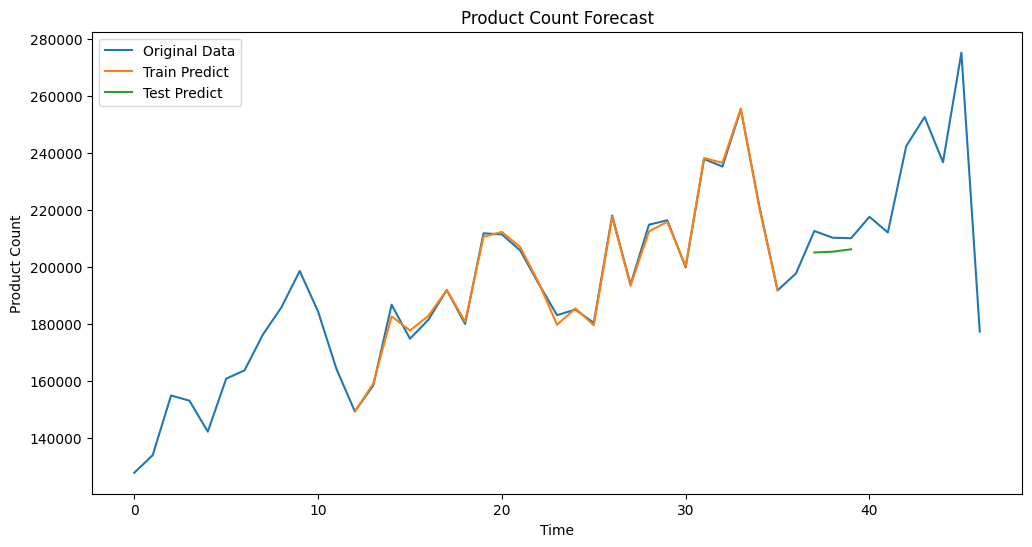

In [20]:

# Plot the results
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[train_time_step:len(train_predict) + train_time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (train_time_step) + 1:len(train_predict) + (train_time_step) + 1 + len(test_predict), :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_plot, label='Train Predict')
plt.plot(test_plot, label='Test Predict')
plt.title('Product Count Forecast')
plt.xlabel('Time')
plt.ylabel('Product Count')
plt.legend()
plt.show()
